In [3]:
 import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


In [26]:
def create_transition_matrix(k):
    elements = 2 * k + 1
    P = np.zeros((elements, elements))

    for i in range(elements):
        if i == 0:
            P[i][i + 1] = 1
        elif i == elements - 1:
            P[i][i - 1] = 1
        else:
            P[i][i - 1] = 0.5
            P[i][i + 1] = 0.5

    return P


In [27]:
k = 2
transition_matrix = create_transition_matrix(k)
# Print the transition matrix
print("Transition Matrix for k =", k)

print(transition_matrix)

Transition Matrix for k = 2
[[0.  1.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0. ]
 [0.  0.5 0.  0.5 0. ]
 [0.  0.  0.5 0.  0.5]
 [0.  0.  0.  1.  0. ]]


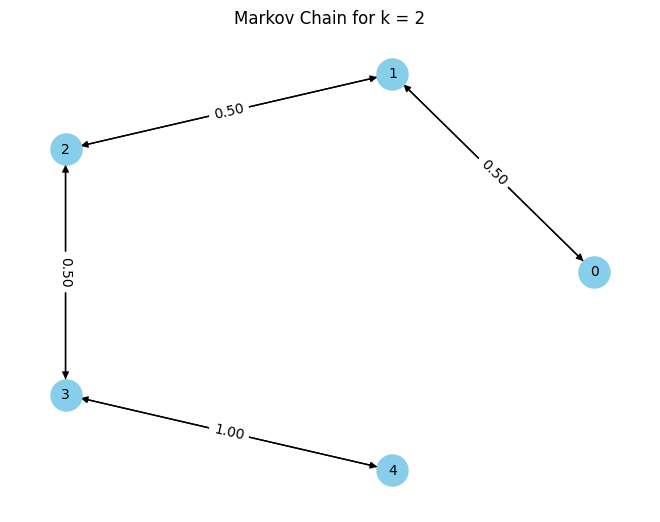

In [28]:

# Create and draw the directed graph of the Markov chain
G = nx.DiGraph()
states = [str(i) for i in range(2 * k + 1)]
G.add_nodes_from(states)
for i in range(2 * k + 1):
    for j in range(2 * k + 1):
        if transition_matrix[i][j] > 0:
            G.add_edge(states[i], states[j], weight=transition_matrix[i][j])

pos = nx.circular_layout(G)
labels = {i: i for i in G.nodes()}
edge_labels = {(i, j): f"{G[i][j]['weight']:.2f}" for i, j in G.edges()}
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title(f"Markov Chain for k = {k}")
plt.show()


this is irreduicible as everything is connected by a directed path

In [29]:
def stat_distribution(transition_matrix):
    eigvals, eigvecs = np.linalg.eig(transition_matrix.T)
    return eigvecs[:, 0] / eigvecs[:, 0].sum()

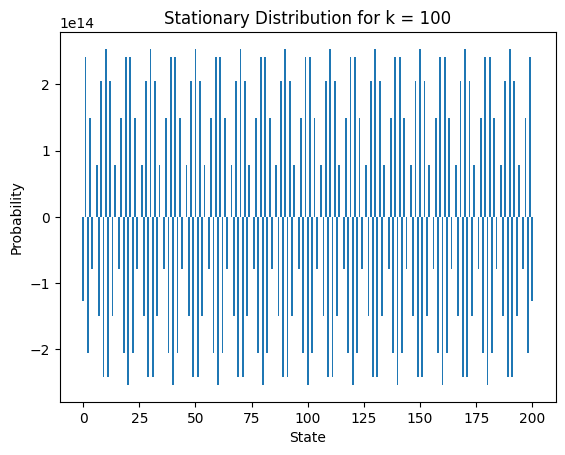

In [30]:
k = 100
stationary = stat_distribution(create_transition_matrix(k))
states = np.arange(2 * k + 1)

plt.figure()
plt.bar(states, stationary)
plt.title(f"Stationary Distribution for k = {k}")
plt.xlabel("State")
plt.ylabel("Probability")
plt.show()